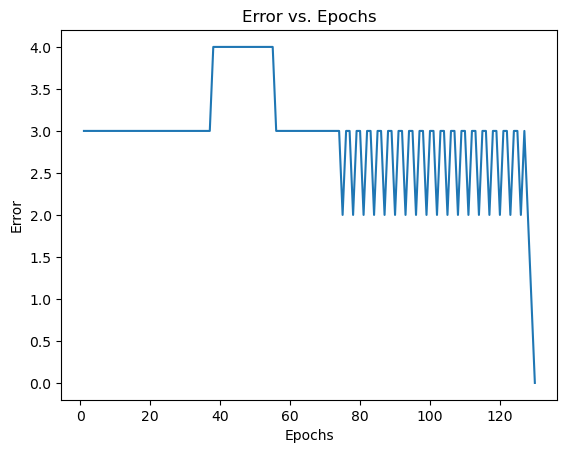

Final Weights:
W0: -0.10000000000000765
W1: 0.1000000000000001
W2: 0.05000000000000032


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize weights and parameters
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05
max_epochs = 1000
convergence_error = 0.002
error_values = []

# Define AND gate training data
A = [0, 0, 1, 1]
B = [0, 1, 0, 1]
Z = [0, 0, 0, 1]

# Step activation function
def step_function(x):
    if x >= 0:
        return 1
    else:
        return 0

# Training loop
for epoch in range(max_epochs):
    SSE = 0  # Sum of squared errors for this epoch
    for i in range(len(A)):
        weighted_sum = W0 + W1 * A[i] + W2 * B[i]
        output = step_function(weighted_sum)
        error = Z[i] - output
        W0 += learning_rate * error
        W1 += learning_rate * error * A[i]
        W2 += learning_rate * error * B[i]
        SSE += error ** 2
    error_values.append(SSE)
    if SSE <= convergence_error:
        break

# Plot epochs vs. error values
plt.plot(range(1, epoch + 2), error_values)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs')
plt.show()

# Print final weights
print("Final Weights:")
print("W0:", W0)
print("W1:", W1)
print("W2:", W2)


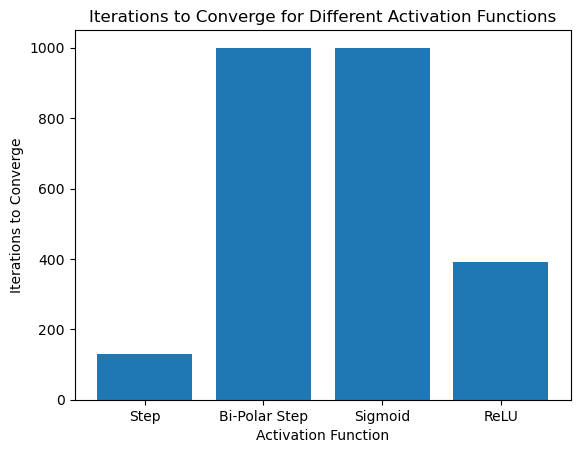

In [17]:
import matplotlib.pyplot as plt
import math

# Initialize weights and parameters (same as A1)
initial_W0 = 10
initial_W1 = 0.2
initial_W2 = -0.75
learning_rate = 0.05
max_epochs = 1000
convergence_error = 0.002
error_values = []

# Define AND gate training data (same as A1)
A = [0, 0, 1, 1]
B = [0, 1, 0, 1]
Z = [0, 0, 0, 1]

# Activation functions
def step_function(x):
    if x >= 0:
        return 1
    else:
        return 0

def bipolar_step_function(x):
    if x >= 0:
        return 1
    else:
        return -1

def sigmoid_function(x):
    return 1 / (1 + math.exp(-x))

def relu_function(x):
    return max(0, x)

# Function to train and return the number of iterations needed for convergence
def train_perceptron(activation_function, initial_W0, initial_W1, initial_W2):
    W0 = initial_W0
    W1 = initial_W1
    W2 = initial_W2
    iterations = 0
    for epoch in range(max_epochs):
        SSE = 0
        for i in range(len(A)):
            weighted_sum = W0 + W1 * A[i] + W2 * B[i]
            output = activation_function(weighted_sum)
            error = Z[i] - output
            W0 += learning_rate * error
            W1 += learning_rate * error * A[i]
            W2 += learning_rate * error * B[i]
            SSE += error ** 2
        iterations += 1
        if SSE <= convergence_error:
            break
    return iterations

# Experiment with different activation functions
activation_functions = [step_function, bipolar_step_function, sigmoid_function, relu_function]
activation_labels = ["Step", "Bi-Polar Step", "Sigmoid", "ReLU"]
convergence_iterations = []

for activation_function in activation_functions:
    iterations = train_perceptron(activation_function, initial_W0, initial_W1, initial_W2)
    convergence_iterations.append(iterations)

# Plot convergence iterations for each activation function
plt.bar(activation_labels, convergence_iterations)
plt.xlabel('Activation Function')
plt.ylabel('Iterations to Converge')
plt.title('Iterations to Converge for Different Activation Functions')
plt.show()
